Welcome to my blog on Bayesian linear regression, where we explore the power of this technique. While traditional linear regression provides point estimates, Bayesian linear regression incorporates prior knowledge and quantifies uncertainty. By combining observed data with prior beliefs, we make more informed decisions. Throughout this blog, we'll delve into key components like probalistic approch to linear regression, basics of types of uncertainity, prior distributions, likelihood functions, and posterior inference. Let's embark on this enlightening journey together.

# What is Uncertainity?
In nearly all real-world situations, our data and knowledge about the world is incomplete, indirect and noisy. Hence, uncertainty must be a fundamental part of our decision-making process. It provides us valuable information about trustworthiness and reliability of model predictions.
- There are two types of uncertainty :

1. Aleatoric uncertainty, which is the uncertainty that arises from the data. It is inherited in data and can't be reduced as it is caused by data generation process.
2. Epistemic uncertainty, which is the uncertainty that arises from the model(here regression model). 
We usually predict the uncertainty in data (aleatoric) still be uncertain about the uncertainity based on model parameters(epistemic).

- This is exaclty why we need to learn bayesian approch. It provides a way to learn uncertainty. We will see basic bayeian approch in linear regression called bayesian linear regression.
-But lets first discuss implementing linear regression before diving into the  Bayesian linear regression.

# Linear Regression 

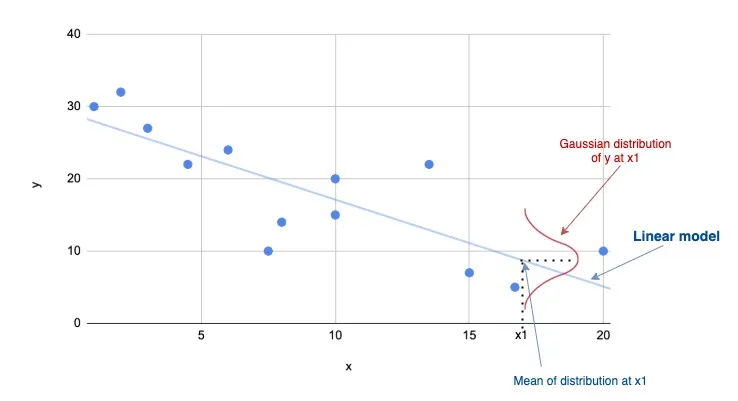

Linear regression is about finding a linear model that best fit a given dataset. Here we will discuss probabilistic interpretation of linear regression


We make two assumptions.
1. The observed value of y for a given data point x is sum of predicted value and error term of the form 
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\, ,\quad \boldsymbol\theta = \begin{bmatrix}\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

2. The error term is independently and identically distributed and is Normally distributed with mean 0 and variance sigma squared.
$$\quad \epsilon \sim \mathcal N(0, \sigma^2)$$

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

Here, we are interested in finding good parameters $\boldsymbol\theta$.

$$ 
\boxed{ \begin{array}{l}
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \theta \ \ \ \ \ \ \ \ \ \sigma \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \downarrow \ \ \ \swarrow \\
\ \ \ x_{n} \ \ \rightarrow \ y_{n} \ \ \\
\ \ n\ =\ 1,......,N\ \\
\\
\end{array} }
$$
$$ Probabilistic \ graphical \ model \ for \ linear \ regression $$

Let's first see the demo dataset

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal, norm
from numpy.random import seed, uniform, randn
from numpy.linalg import inv

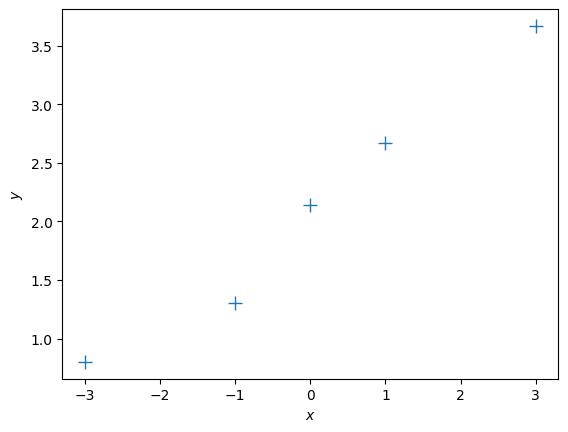

In [2]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector
y = y + 2.0
# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

## Maximum Likelihood
We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta_{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta_{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [3]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X])

In [4]:
def max_lik_estimate(X, y):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    N, D = X.shape
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y) ## <-- SOLUTION
    return theta_ml

In [104]:
theta_ml = max_lik_estimate(X_aug,y)
print(theta_ml)

[[2.116]
 [0.499]]


Now we will make predictions at test inputs $\boldsymbol X_{\text{test}}\in\mathbb{R}$, 
$$
\ \boldsymbol y_{\text{pred}} = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta_{\text{ML}}
$$

In [105]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs
ml_prediction = Xtest_aug @ theta_ml


Text(0, 0.5, '$y$')

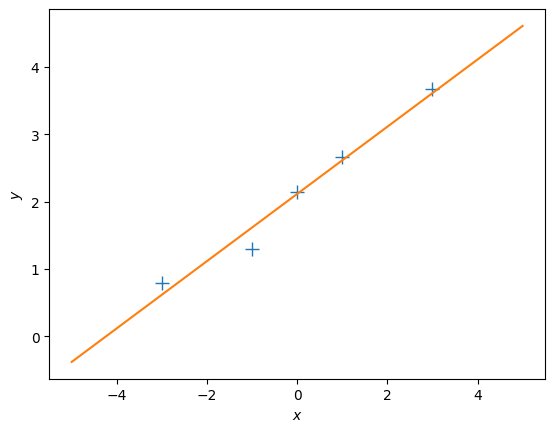

In [106]:
# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

This gives fairly good results but what if the data is bit complex

Let us have a look at an example where the observations clearly do not lie on a straight line:

In [107]:
N = 10
mu = 0
sigma = 0.2**2
seed(10)
xn = np.random.uniform(-5, 5, N)
epsilon = np.random.normal(mu, sigma, N)
yn = -np.sin(xn/5) + np.cos(xn) + epsilon
dataset = np.column_stack((xn, yn))
xn = xn.reshape(-1,1)
yn = yn.reshape(-1,1)

(-5.0, 5.0)

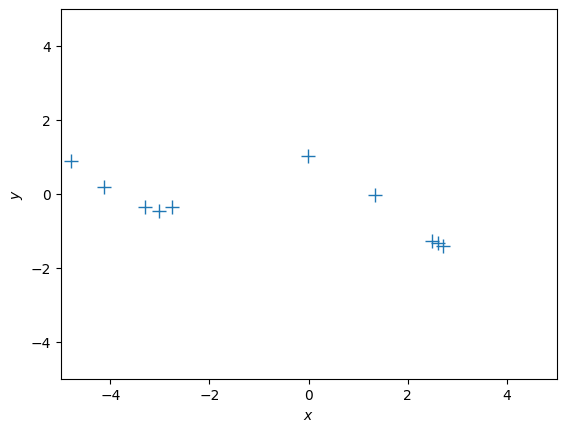

In [108]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

Lets first apply linear regressoin without non linear transformation

In [109]:
N, D = xn.shape
X_aug = np.hstack([np.ones((N,1)), xn]) # augmented training inputs of size N x (D+1)
# theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

In [110]:
theta_aug_ml = max_lik_estimate(X_aug, yn)
theta_aug_ml

array([[-0.47109666],
       [-0.1808517 ]])

In [111]:
ml_predictions = X_aug @ theta_aug_ml 
# X: K x D matrix of test inputs
# theta: D x 1 vector of parameters
# returns: prediction of f(X); K x 1 vector

(-5.0, 5.0)

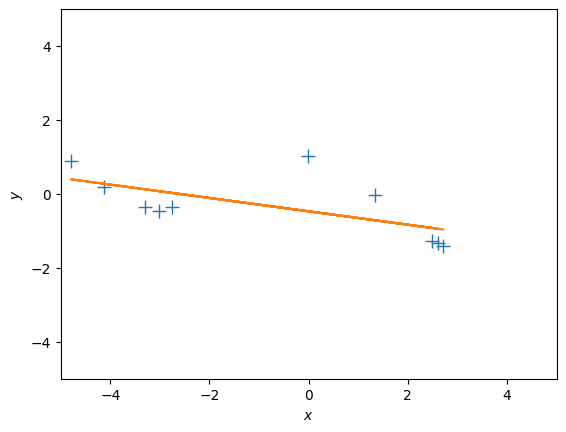

In [112]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.plot(xn, ml_predictions)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

## Polynomial Regression

### Nonlinear Features
So far, we have looked at linear regression with linear features. This allowed us to fit straight lines. However, linear regression also allows us to fit functions that are nonlinear in the inputs $\boldsymbol x$, as long as the parameters $\boldsymbol\theta$ appear linearly. This means, we can learn functions of the form
$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
where the features $\phi_k(\boldsymbol x)$ are (possibly nonlinear) transformations of the inputs $\boldsymbol x$.


Polynomial Regression class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

Let us start by computing the feature matrix $\boldsymbol \Phi$

In [113]:
def poly_features(X, p):
    """Returns a matrix with p columns containing the polynomial features of the input vector X."""
    X = X.flatten()
    return np.array([1.0*X**i for i in range(p+1)]).T

With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [114]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate
    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
        
    # maximum likelihood estimate
    C = scipy.linalg.cho_factor(PP)
    theta_ml = scipy.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y 
    
    return theta_ml

To make predictions at test inputs $\boldsymbol X_{\text{test}}\in\mathbb{R}$, we need to compute the features (nonlinear transformations) $\boldsymbol\Phi_{\text{test}}= \boldsymbol\phi(\boldsymbol X_{\text{test}})$ of $\boldsymbol X_{\text{test}}$ to give us the predicted mean
$$
\mathbb{E}[\boldsymbol y_{\text{test}}] = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta^{\text{ML}}
$$

In [115]:
p = 4
Phi = poly_features(xn, p)
theta_ml = nonlinear_features_maximum_likelihood(Phi, yn)
X_test = np.linspace(-5,5, 100).reshape(-1,1)
Phi_test =  poly_features(X_test, p)
y_pred = Phi_test @ theta_ml

(-5.0, 5.0)

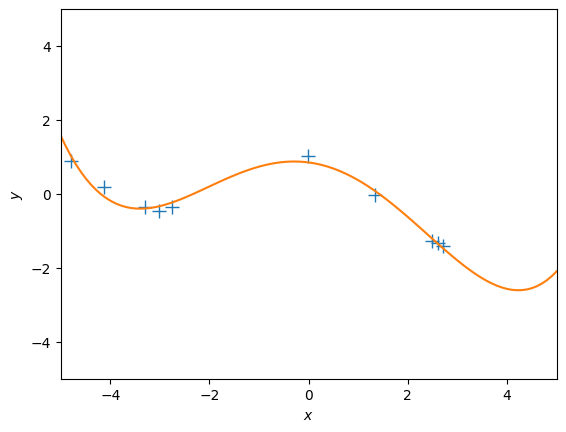

In [116]:
# Plot the training set
plt.figure()
plt.plot(xn, yn, '+', markersize=10)
plt.plot(X_test, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5) 
plt.xlim(-5, 5) 

Now lets try different polynomial fits.

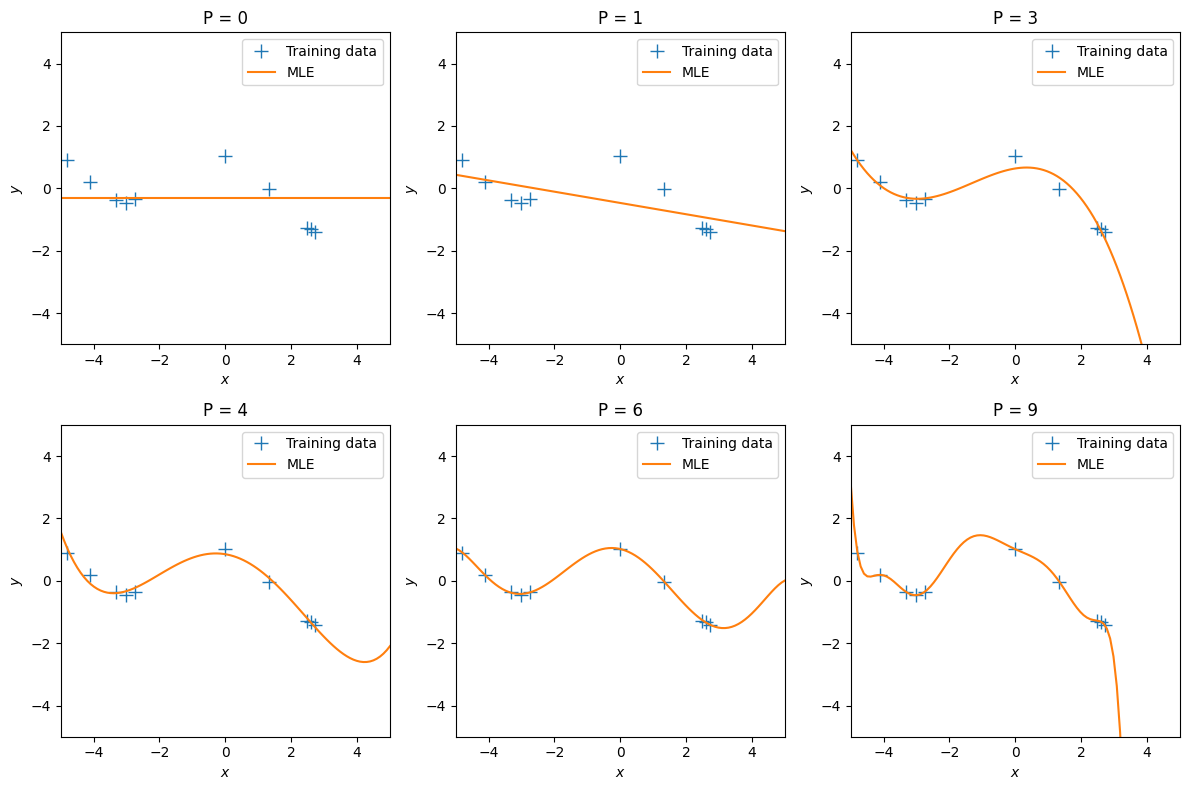

In [117]:
# Values of p to consider
p_values = [0, 1, 3, 4, 6, 9]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, p in enumerate(p_values):

    Phi = poly_features(xn, p)
    theta_ml = nonlinear_features_maximum_likelihood(Phi, yn)
    Phi_test = poly_features(X_test, p)
    y_pred = Phi_test @ theta_ml

    ax = axs[i // 3, i % 3]  # Get the correct subplot
    ax.plot(xn, yn, '+', markersize=10,label='Training data')
    ax.plot(X_test, y_pred, label = 'MLE')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_title(f"P = {p}")
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


You can refer 9.1 and 9.2 section of [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) to understand in depth about probalistic approch to linear regression.

# Bayesian Linear Regression

Bayesian linear regression is the Bayesian interpretation of linear regression.

So far we computed point estimates of our parameters. For example, in linear regression we chose values for the weights and bias that minimized our mean squared error cost function.

In the Bayesian approach we don’t work with exact values but with probabilities. This allows us to model the uncertainty in our parameter estimates.

In nearly all real-world situations, our data and knowledge about the world is incomplete, indirect and noisy. Hence, uncertainty must be a fundamental part of our decision-making process. This is exactly what the Bayesian approach is about. It provides a formal and consistent way to reason in the presence of uncertainty.

## Bayes theroem
The basis of bayesian linear regression is bayes theroem.
- Bayes' theorem looks as follows:
$$
\begin{equation}
p(\boldsymbol{\theta} | \mathbf{x}, y) = \frac{p(y | \boldsymbol{x}, \boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\boldsymbol{x}, y)}
\end{equation}
$$
- $p(y | \boldsymbol{x}, \boldsymbol{\theta})$ is the *likelihood*. It describes the probability of the target values given the data and parameters.
- $p(\boldsymbol{\theta})$ is the *prior*. It describes our initial knowledge about which parameter values are likely and unlikely.
- $p(\boldsymbol{x}, y)$ is the *evidence*. It describes the joint probability of the data and targets.

## Bayesian inference
In general, Bayesian inference works as follows:
1. We start with some prior belief about a hypothesis $p(h)$
2. We observe some data, representating new evidence $e$
3. We use Bayes' theorem to update our belief given the new evidence: $p(h|e) = \frac{p(e |h)p(h)}{p(e)}$ 

Have a look at [Wiki](https://en.wikipedia.org/wiki/Bayesian_inference)

## Bayeisan approch

Unlike linear regression where we computed point estimates of our parameters using maximum likelihood approach and make predictions, here in Bayesian linear regression we estimate 

Following are the steps:
1. We assume a that we know standard deviation of the noise, mean and covariance of the prior. 
2. We than calculate parameter posteriori
3. Based on that we make posteriori predictions on unseen data ie. test data.

Now lets see along with code 

Here we have same assumptions that we took in linear regression
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
Where epsilon is the noise from normal distribution with variance $\sigma^2$. Training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.


Function

In [118]:
def g(x, mu, sigma):   
    epsilon = np.random.normal(mu, sigma, size=(x.shape))
    return np.cos(x) + epsilon
    

We apply non linear feature transformation on  feature matrix with polynomial of degree $K$ 
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$


Sample to see nonlinear transformation

In [119]:
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1


In [120]:
poly_features(X, 3) # defined in linear regression section

array([[  1.,  -3.,   9., -27.],
       [  1.,  -1.,   1.,  -1.],
       [  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   3.,   9.,  27.]])

## Known entities

In [121]:
sigma = 1.0 # standard deviation of the noise
m0 = 0.0 # mean of the prior
S0 = 1.0 # covariance of the prior  
p = 6 # order of the polynomial 

$$ 
 \boxed{\begin{array}{l}
\ \ \ \ \ \ \ \ \ m_{0} \ \ \ \ \ \ \ \ \ \ \ \ S_{0}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \searrow \ \ \ \swarrow \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \theta \ \ \ \ \ \ \ \ \ \ \ \sigma \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \downarrow \ \ \ \swarrow \\
\ \ \ \ x_{n} \ \ \rightarrow \ \ y_{n} \ \ \\
\ \ \ \ n\ =\ 1,......,N\ \\
\end{array}} 
$$
$$ Graphical \ model \ for \ Bayeisan \ linear \ regression $$

In [122]:
N = 100 # number of data points
X = np.random.uniform(high=5, low=-5, size=(N,1)) # training inputs, size Nx1
y = g(X, m0, sigma) # training targets, size Nx1

## Posterior


### Parameter posteriori in closed form 
Calculating Parameter posterior:
$$
\begin{aligned}
p(\boldsymbol{\theta} \mid \mathcal{X}, \mathcal{Y}) &=\mathcal{N}\left(\boldsymbol{\theta} \mid \boldsymbol{m}_{N}, \boldsymbol{S}_{N}\right) \\
\boldsymbol{S}_{N} &=\left(\boldsymbol{S}_{0}^{-1}+\sigma^{-2} \boldsymbol{\Phi}^{\top} \boldsymbol{\Phi}\right)^{-1} \\
\boldsymbol{m}_{N} &=\boldsymbol{S}_{N}\left(\boldsymbol{S}_{0}^{-1} \boldsymbol{m}_{0}+\sigma^{-2} \boldsymbol{\Phi}^{\top} \boldsymbol{y}\right)
\end{aligned}
$$

In [123]:
def posterior(X, y, p, m0, S0, sigma):
    """Returns the posterior mean and covariance matrix of the weights given the training data."""
    poly_X = poly_features(X, p)

    SN = scipy.linalg.inv(1.0 * np.eye(p+1) / S0  + 1.0/sigma**2 * poly_X.T @ poly_X)
    mN = SN @ (m0 / S0 + (1.0/sigma**2) * poly_X.T @ y)    
    
    return mN, SN

In [124]:
mN , SN = posterior(X, y, p ,m0, S0, sigma)

In [125]:
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

poly_X_test = poly_features(Xtest, p)

### Posterior Predictive distribution
Now, let's make predictions (ignoring the measurement noise). We obtain three predictors:
$$
\begin{align}
&\text{Bayesian: } p(f(\boldsymbol X_{\text{test}}) \, |\ X, Y, \boldsymbol X_{\text{test}}) = \mathcal N(f(\boldsymbol X_{\text{test}}) \,|\, \boldsymbol \phi(X_{\text{test}}) \boldsymbol M_{\text{n}},\, \boldsymbol\phi(X_{\text{test}}) \boldsymbol S_{\text{N}}  \boldsymbol\phi(X_{\text{test}})^\top + \sigma ^ 2)
\end{align} $$
We already computed all quantities. Write some code that implements all three predictors.

In [126]:
posterior_pred_mean = poly_X_test @ mN

posterior_pred_uncertainty_para = poly_X_test @ SN @ poly_X_test.T

posterior_pred_var = sigma**2 + posterior_pred_uncertainty_para

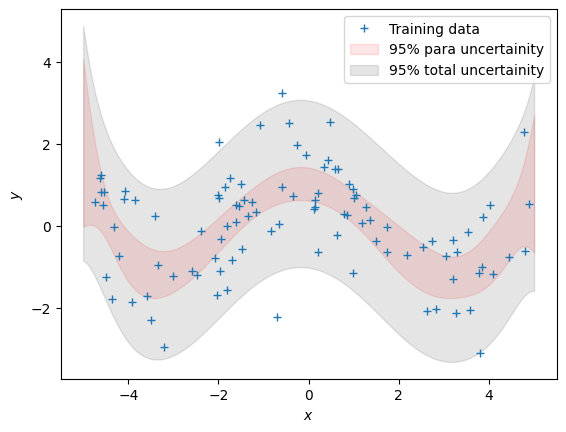

In [129]:
# plot the posterior
plt.figure()
plt.plot(X, y, "+")
# plt.plot(Xtest, m_mle_test)
# plt.plot(Xtest, m_map_test)
posterior_pred_mean = posterior_pred_mean.flatten()
var_blr = np.diag(posterior_pred_uncertainty_para)

# conf_bound1 = np.sqrt(var_blr).flatten()
# plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound1, posterior_pred_mean - conf_bound1, alpha = 0.1, color="k")

# 95 % parameter uncertainity
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound2, posterior_pred_mean - conf_bound2, alpha = 0.1, color="r")

# 95 % total uncertainity ie. 
conf_bound3 = 2.0*np.sqrt(var_blr + sigma**2).flatten()
plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound3, posterior_pred_mean - conf_bound3, alpha = 0.1, color="k")

plt.legend(["Training data", '95% para uncertainity', '95% total uncertainity'])
plt.xlabel('$x$');
plt.ylabel('$y$');

You can refer 9.3 section of [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) to understand in depth about bayesian linear regression. 

### Visulizing the parameter Posterior

In this section we will visualize the posterior and will see how it changes as it sees more data.

In [136]:
def f(x, a): return a[0] + a[1] * x


def plot_prior(m, S, liminf=-1, limsup=1, step=0.05, ax=plt, **kwargs):
    grid = np.mgrid[liminf:limsup + step:step, liminf:limsup + step:step]
    nx = grid.shape[-1]
    z = multivariate_normal.pdf(grid.T.reshape(-1, 2), mean=m.ravel(), cov=S).reshape(nx, nx).T
    
    return ax.contourf(*grid, z, **kwargs)

def plot_sample_w(mean, cov, size=10, ax=plt):
    w = np.random.multivariate_normal(mean=mean.ravel(), cov=cov, size=size)
    x = np.linspace(-1, 1)
    for wi in w:
        ax.plot(x, f(x, wi), c="tab:blue", alpha=0.4)

def plot_likelihood_obs(X, T, ix, ax=plt):
    """
    Plot the likelihood function of a single observation
    """
    W = np.mgrid[-1:1:0.1, -1:1:0.1]
    x, t = sample_vals(X, T, ix) # ith row
    mean = W.T.reshape(-1, 2) @ x.T

    likelihood = norm.pdf(t, loc=mean, scale= np.sqrt(sigma **2)).reshape(20, 20).T
    ax.contourf(*W, likelihood)
    ax.scatter(-0.3, 0.5, c="white", marker="+")

def sample_vals(X, T, ix):
    """
    
    Returns
    -------
    Phi: The linear model transormation
    t: the target datapoint
    return ith data
    """
    x_in = X[ix]
    Phi = np.c_[np.ones_like(x_in), x_in]
    t = T[[ix]]
    return Phi, t

def posterior_w(phi, t, S0, m0):
    """
    Compute the posterior distribution of 
    a Gaussian with known precision and conjugate
    prior a gaussian
    
    Parameters
    ----------
    phi: np.array(N, M)
    t: np.array(N, 1)
    S0: np.array(M, M)
        The prior covariance matrix
    m0: np.array(M, 1)
        The prior mean vector
    """
    SN = inv(inv(S0) + ((1 / sigma) ** 2) * phi.T @ phi)
    mN = SN @ (inv(S0) @ m0 + ((1 / sigma) ** 2) * phi.T @ t)
    return SN, mN


In [141]:
seed(314)
a = np.array([-0.3, 0.5]) # true parameter values
N = 30
sigma = 0.2
X = uniform(-1, 1, (N, 1))
T = f(X, a) + randn(N, 1) * sigma

In [142]:
# beta = (1 / sigma) ** 2 # precision
alpha = 2.0

In [143]:
SN = np.eye(2) / alpha
mN = np.zeros((2, 1))
seed(1643)

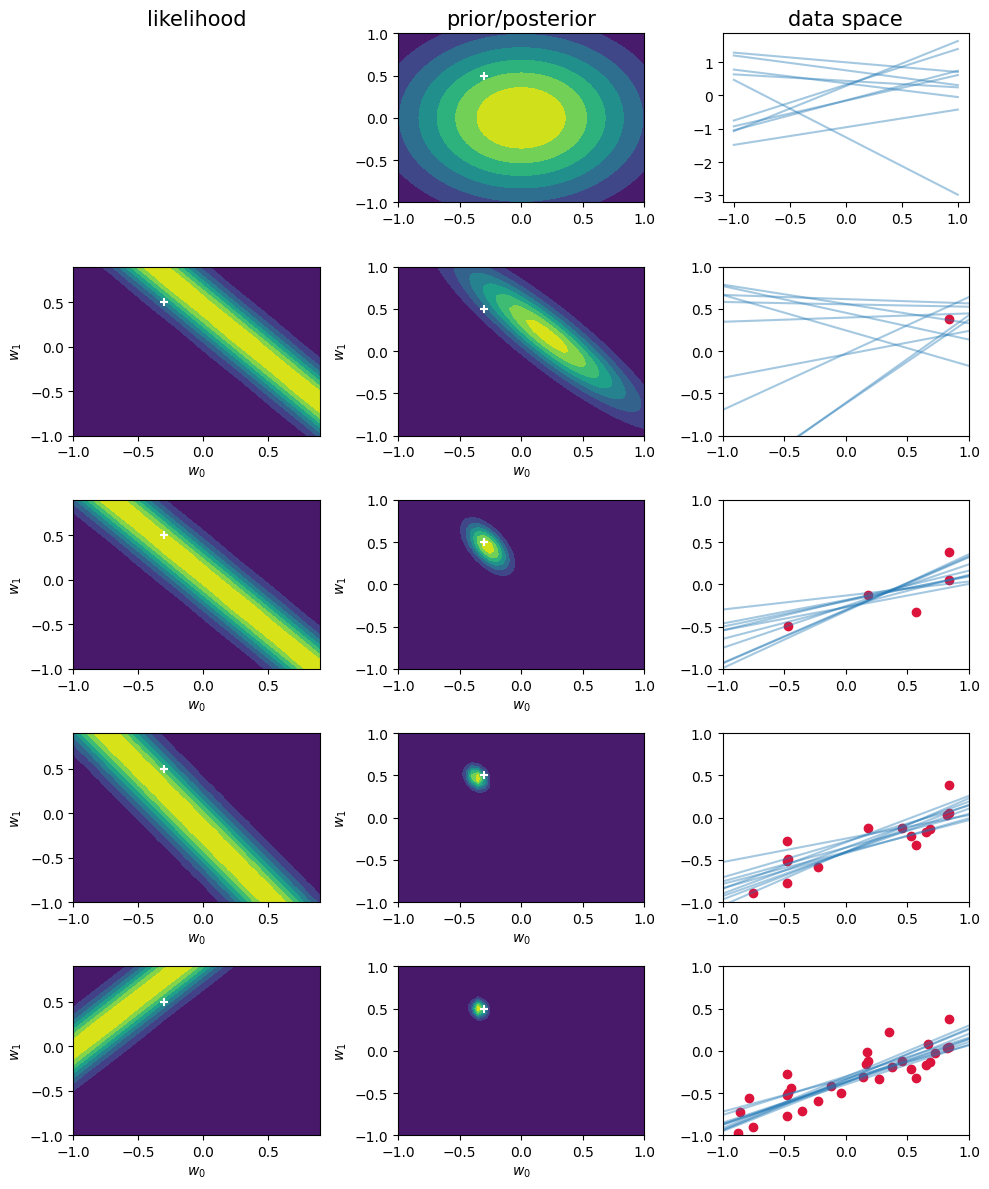

In [144]:
nobs = [1, 5, 15, 30]
ix_fig = 1
fig, ax = plt.subplots(len(nobs) + 1, 3, figsize=(10, 12))
plot_prior(mN, SN, ax=ax[0,1])
ax[0, 1].scatter(-0.3, 0.5, c="white", marker="+")
ax[0, 0].axis("off")
plot_sample_w(mN, SN, ax=ax[0, 2])
for i in range(0, N):
    Phi, t = sample_vals(X, T, i)
    SN, mN = posterior_w(Phi, t, SN, mN)
    if i+1 in nobs:
        plot_likelihood_obs(X, T, i, ax=ax[ix_fig, 0])
        plot_prior(mN, SN, ax=ax[ix_fig, 1])
        ax[ix_fig, 1].scatter(-0.3, 0.5, c="white", marker="+")
        ax[ix_fig, 2].scatter(X[:i + 1], T[:i + 1], c="crimson")
        ax[ix_fig, 2].set_xlim(-1, 1)
        ax[ix_fig, 2].set_ylim(-1, 1)
        for l in range(2):
            ax[ix_fig, l].set_xlabel("$$\theta_0$$")
            ax[ix_fig, l].set_ylabel("$$\theta_1$$")
        plot_sample_w(mN, SN, ax=ax[ix_fig, 2])
        ix_fig += 1

titles = ["likelihood", "prior/posterior", "data space"]
for axi, title in zip(ax[0], titles):
    axi.set_title(title, size=15)
plt.tight_layout()

We can see above as the model see more data, the posterior converges close the the true values at end.
Refer to [Bishop - Pattern Recognition and Machine Learning fig 3.7](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) to understand above fig in detail.